In [5]:
import pandas as pd
df=pd.read_csv(r'D:\Documentos Mauricio\Desktop\Diplomatura FAMAF2022\Mentoría_Sistema de Transporte Urbano\Practico 3\base_procesada.csv')

In [6]:
df.head(3)

,Unnamed: 0,TARJETA,dia_numero,hora,CONTRATO2,SENTIDO_Ida,SENTIDO_Vuelta,LINEA_A,LINEA_A1,LINEA_A600,...,dia_promedio,cant_lunes,cant_martes,cant_miercoles,cant_jueves,cant_viernes,cant_sabado,cant_domingo,cant_ida,cant_vuelta
0,24,1000013,2,17,0,0,1,0,0,0,...,101.0,2,0,0,0,0,0,0,1,1
1,28,1000017,2,10,6,0,1,0,0,0,...,2.0,1,0,0,0,0,0,0,0,1
2,44,1000026,2,14,6,0,1,0,0,0,...,2.0,1,0,0,0,0,0,0,0,1


In [7]:
##BORRAMOS COLUMNAS INNECESARIAS##
df.drop(df.columns[[0, 2, 3,78,79,80,81,82,83,84]], axis=1, inplace=True)

In [8]:
## BORRAMOS LOS TIPOS DE CONTRATOS COMUNES##
## CATEGORIAS DE CONTRATOS= 0 (ADULTOS MAYORES), 1 (BEG), 2(BOS), 3(BSC), 4(Discapacidad), 5(Resto), 6(usuarios comunes)
df=df.loc[df.CONTRATO2!=6]

In [9]:
df.CONTRATO2.value_counts()

1    83263
0    33948
4    15589
5    11261
3    10358
2     9666
Name: CONTRATO2, dtype: int64

In [10]:
##ESTE VA A SER EL INSUMO PARA APLICAR ML**
df.columns

Index(['TARJETA', 'CONTRATO2', 'SENTIDO_Ida', 'SENTIDO_Vuelta', 'LINEA_A',
       'LINEA_A1', 'LINEA_A600', 'LINEA_A601', 'LINEA_AeroBus', 'LINEA_B',
       'LINEA_B1', 'LINEA_B30', 'LINEA_B60', 'LINEA_B80-Tamse', 'LINEA_C',
       'LINEA_C1', 'LINEA_CAU', 'LINEA_L10', 'LINEA_L11', 'LINEA_L12',
       'LINEA_L13', 'LINEA_L14', 'LINEA_L15', 'LINEA_L16', 'LINEA_L17',
       'LINEA_L18', 'LINEA_L19', 'LINEA_L20', 'LINEA_L22', 'LINEA_L23',
       'LINEA_L24', 'LINEA_L25', 'LINEA_L26', 'LINEA_L27', 'LINEA_L28',
       'LINEA_L29', 'LINEA_L30 C', 'LINEA_L31 T', 'LINEA_L32 T', 'LINEA_L33 T',
       'LINEA_L34 C', 'LINEA_L35 T', 'LINEA_L36 T', 'LINEA_L40 E',
       'LINEA_L41 E', 'LINEA_L42 E', 'LINEA_L43 E', 'LINEA_L44 E', 'LINEA_L45',
       'LINEA_L50', 'LINEA_L51', 'LINEA_L52', 'LINEA_L53', 'LINEA_L54',
       'LINEA_L60', 'LINEA_L61', 'LINEA_L62', 'LINEA_L63', 'LINEA_L64',
       'LINEA_L65', 'LINEA_L66', 'LINEA_L67', 'LINEA_L68', 'LINEA_L70',
       'LINEA_L71', 'LINEA_L72', 'LINEA_L73',

In [11]:
df.describe()

,TARJETA,CONTRATO2,SENTIDO_Ida,SENTIDO_Vuelta,LINEA_A,LINEA_A1,LINEA_A600,LINEA_A601,LINEA_AeroBus,LINEA_B,...,dia_promedio,cant_lunes,cant_martes,cant_miercoles,cant_jueves,cant_viernes,cant_sabado,cant_domingo,cant_ida,cant_vuelta
count,1.640850e+05,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,...,1.640850e+05,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000,164085.000000
mean,1.326225e+06,1.537801,0.364500,0.635500,0.027778,0.038736,0.029771,0.028260,0.000067,0.077893,...,inf,4.524326,3.681427,1.786830,3.583752,3.531718,0.002444,0.000055,8.677740,8.432812
std,1.636086e+05,1.477229,0.481291,0.481291,0.164338,0.192966,0.169956,0.165715,0.008187,0.268003,...,NaN,3.950194,3.197197,1.861796,3.218453,3.205925,0.059557,0.007406,7.348696,7.161716
min,1.000006e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.198246e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.886299e+11,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000
50%,1.293686e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.607864e+25,4.000000,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,7.000000,7.000000
75%,1.449621e+06,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.770396e+48,7.000000,6.000000,3.000000,6.000000,6.000000,0.000000,0.000000,13.000000,13.000000
max,1.697949e+06,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,inf,75.000000,46.000000,20.000000,42.000000,40.000000,4.000000,1.000000,105.000000,116.000000


In [12]:
import numpy as np
r = df.index[np.isinf(df).any(1)]
print(r)
### EN LA FILA 548637 HAY UN VALOR INFINITO##

Int64Index([548637], dtype='int64')


In [13]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [14]:
##DESPLEGAMOS UN MODELO DE ML PARA PREDECIR LAS CATEGORIAS DE CONTRATO##
##IMPORTAMOS LIBRERIAS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

In [15]:
y = df.CONTRATO2
X = df.drop('CONTRATO2',axis=1)
X.drop('TARJETA',axis=1,inplace=True)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164085 entries, 0 to 696833
Data columns (total 84 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SENTIDO_Ida      164085 non-null  int64  
 1   SENTIDO_Vuelta   164085 non-null  int64  
 2   LINEA_A          164085 non-null  int64  
 3   LINEA_A1         164085 non-null  int64  
 4   LINEA_A600       164085 non-null  int64  
 5   LINEA_A601       164085 non-null  int64  
 6   LINEA_AeroBus    164085 non-null  int64  
 7   LINEA_B          164085 non-null  int64  
 8   LINEA_B1         164085 non-null  int64  
 9   LINEA_B30        164085 non-null  int64  
 10  LINEA_B60        164085 non-null  int64  
 11  LINEA_B80-Tamse  164085 non-null  int64  
 12  LINEA_C          164085 non-null  int64  
 13  LINEA_C1         164085 non-null  int64  
 14  LINEA_CAU        164085 non-null  int64  
 15  LINEA_L10        164085 non-null  int64  
 16  LINEA_L11        164085 non-null  int6

In [17]:
from sklearn.preprocessing import StandardScaler
x_names = X.columns
X = StandardScaler().fit_transform(X)

C:\Users\Mauricio\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [18]:
## PASAMOS LA MATRIZ X A DATAFRAME
X = pd.DataFrame(X, columns=x_names)

In [19]:
##DIVIDIMOS LA BASE YA ESTANDARIZADA EN TRAIN Y TEST##
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [23]:
##PARTIMOS DE UN MODELO DE ARBOL DE CLASIFICACION##

clfs = [DecisionTreeClassifier(random_state=0)]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    #f1_score= f1_score(y_train, train_predictions, average='weighted')
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    #f1_score= f1_score(y_test, train_predictions, average='weighted')
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    #plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 99.08%
Accuracy test {name}: 46.21%


In [113]:
##AJUSTE DE HIPERPARÁMETROS DE LOS MODELOS ELEGIDOS##

grid = GridSearchCV(DecisionTreeClassifier(random_state=10),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
  
grid.fit(x_train,y_train)
grid.best_params_


SyntaxError: positional argument follows keyword argument (Temp/ipykernel_8596/1063991716.py, line 6)

In [92]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))
test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)                
print("f1_score test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
#ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))


Accuracy train Arbol de decisión: 57.97%
f1_score test Arbol de decisión: 56.02%
              precision    recall  f1-score   support

           0       0.43      0.57      0.49      6713
           1       0.64      0.83      0.72     16709
           2       0.36      0.17      0.23      1949
           3       0.05      0.00      0.00      2141
           4       0.30      0.09      0.14      3091
           5       0.16      0.01      0.02      2214

    accuracy                           0.56     32817
   macro avg       0.32      0.28      0.27     32817
weighted avg       0.47      0.56      0.50     32817



In [159]:
##GRAFICAMOS EL ARBOL##
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_83 <= 0.29
|   |--- feature_82 <= 0.25
|   |   |--- feature_73 <= 0.35
|   |   |   |--- feature_76 <= -1.00
|   |   |   |   |--- feature_62 <= 1.70
|   |   |   |   |   |--- feature_25 <= 1.43
|   |   |   |   |   |   |--- feature_23 <= 1.62
|   |   |   |   |   |   |   |--- feature_73 <= -0.30
|   |   |   |   |   |   |   |   |--- feature_73 <= -2.06
|   |   |   |   |   |   |   |   |   |--- feature_73 <= -2.82
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- feature_73 >  -2.82
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_73 >  -2.06
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 1.58
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_7 >  1.58
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_73 >  -0.30
|   |   |   |   |   |   |   |   |--- feature_82 <= -1.11
|   |   |   | 

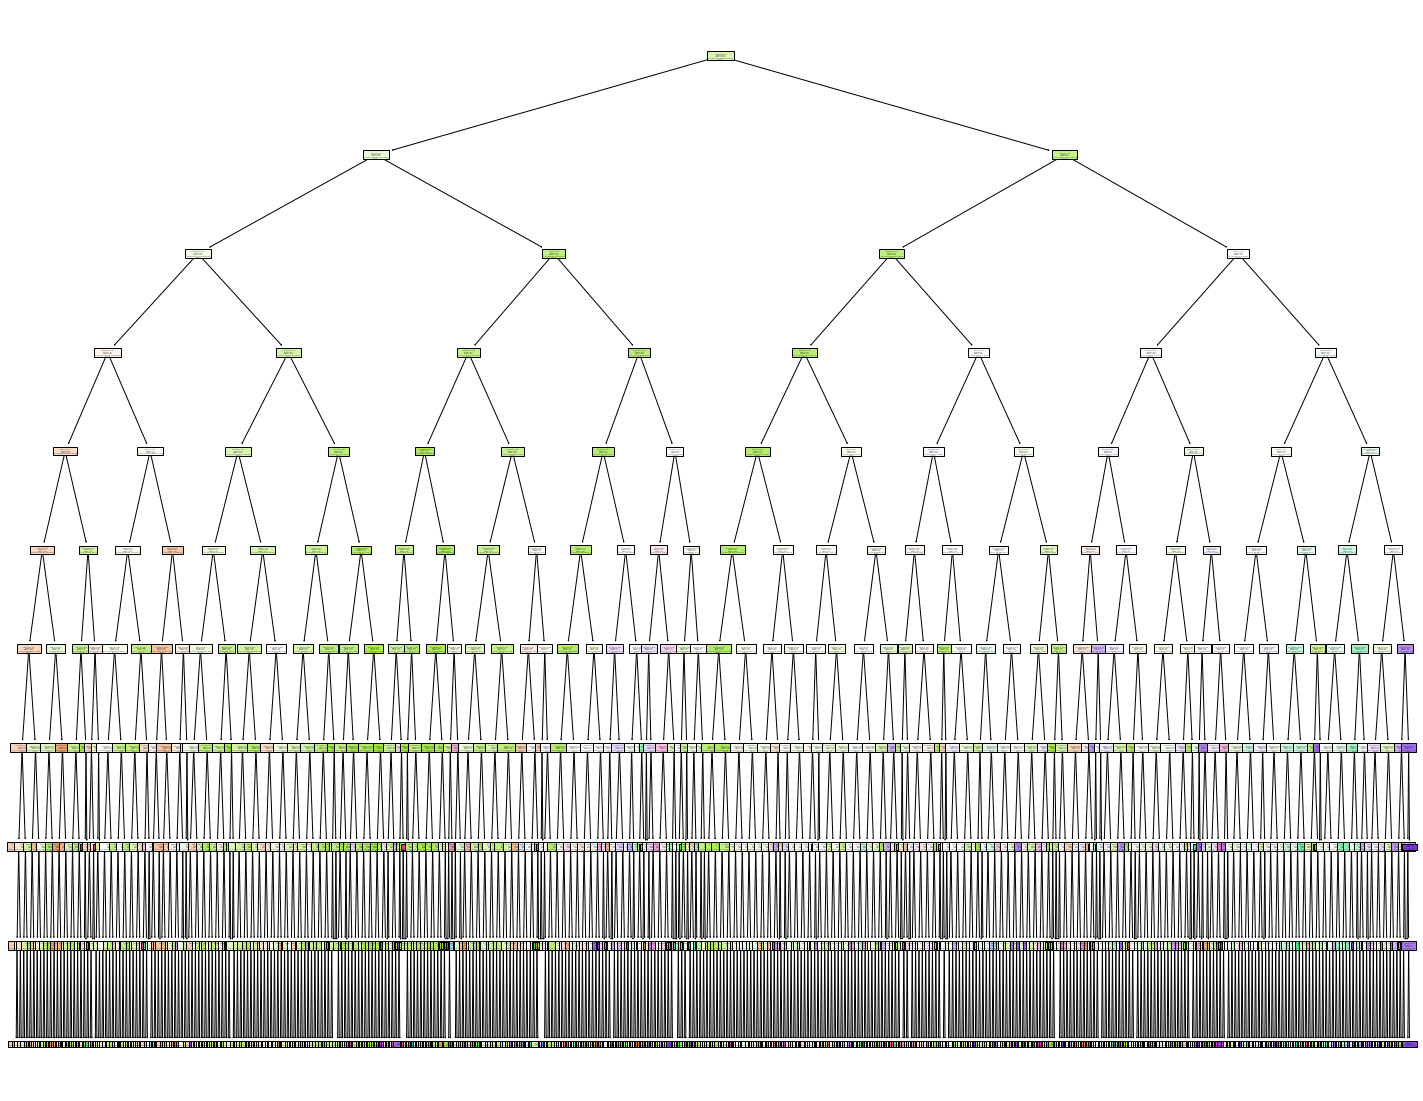

In [172]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=x_train.columns, 
                   class_names=['0', '1', '2', '3','4', '5'],
                   filled=True)
##NO LOGRAMOS ACOTAR EL LISTADO DE VARIABLES A LAS 15 MÁS RELEVANTES PARA QUE EL ARBOL SEA MAS INFORMATIVO## VER

In [169]:
lista=['cant_lunes','cant_martes']

In [148]:
## ¿Cuales son las variables más relevantes para pronosticar el contrato?
feature_imp = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp2=feature_imp[:15]
feature_imp2


cant_vuelta       0.319130
hora_promedio     0.136218
cant_ida          0.128342
cant_viernes      0.084114
cant_martes       0.054077
cant_miercoles    0.053151
cant_lunes        0.032949
cant_jueves       0.032750
LINEA_B           0.031868
LINEA_L20         0.019419
LINEA_L71         0.017480
LINEA_L18         0.013717
LINEA_L26         0.005941
LINEA_B1          0.005085
LINEA_L15         0.004174
dtype: float64

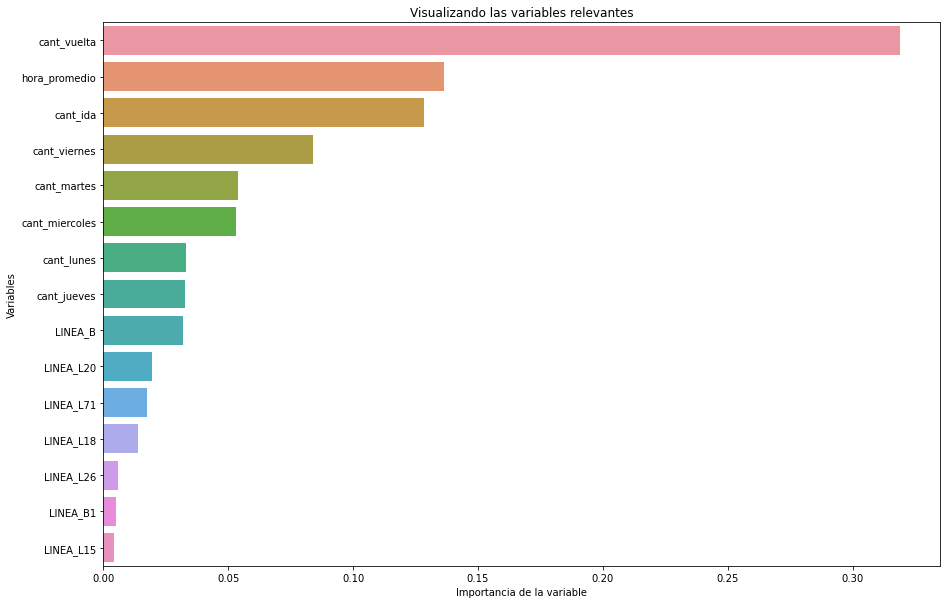

In [149]:
##Graficamos las variables mas importantes##
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
# creamos el gráfico de barras
sns.barplot(x=feature_imp2, y=feature_imp2.index)
# agregamos estilo
plt.xlabel('Importancia de la variable')
plt.ylabel('Variables')
plt.title("Visualizando las variables relevantes")

#MOSTRAMOS LAS 15 VARIABLES MÁS INFLUYENTES PARA PREDECIR LA CATEGORIA DEL CONTRATO (TIPO DE USUARIO)
plt.show()

In [95]:
# Se crea un reporte de clasificación 
from sklearn.metrics import classification_report
crpt= classification_report(y_test, test_predictions, digits=4)
print(crpt)

              precision    recall  f1-score   support

           0     0.4265    0.5686    0.4874      6713
           1     0.6378    0.8340    0.7228     16709
           2     0.3571    0.1668    0.2274      1949
           3     0.0455    0.0005    0.0009      2141
           4     0.2980    0.0919    0.1405      3091
           5     0.1591    0.0095    0.0179      2214

    accuracy                         0.5602     32817
   macro avg     0.3207    0.2785    0.2661     32817
weighted avg     0.4750    0.5602    0.4957     32817



In [96]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 55.82
Precisión test fold 1: 55.61
Precisión test fold 2: 56.35
Precisión test fold 3: 55.86
Precisión test fold 4: 55.85
Avg. accuracy = 55.89861897575295


In [97]:
# Se ajusta un modelo de Regresion Logistica
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log', random_state=0)
model.fit(x_train,y_train)
score = model.score(x_train, y_train)
print("Training score: ", score)

Training score:  0.5566474692994484


In [98]:
from sklearn.metrics import confusion_matrix
ypred= model.predict(x_test)
cm= confusion_matrix(y_test, ypred)
print(cm)
###NOTAR QUE EL MODELO ES MUY BUENO PARA PREDECIR BEG Y BAM Y ES RELATIVAMENTE  MALO PARA EL RESTO DE CATEGORIAS##
## DEFINIR Y EXPLICAR PRECISION Y RECALL##





[[ 2782  3735     7    40   145     4]
 [ 1186 15174    29    26   275    19]
 [  265  1507    39     6   129     3]
 [  655  1416     0    38    30     2]
 [  685  1965    30    37   363    11]
 [  384  1602     7    21   178    22]]


In [99]:
# Se crea un reporte de clasificación 
from sklearn.metrics import classification_report
cr= classification_report(y_test, ypred, digits=4)
print(cr)
##

              precision    recall  f1-score   support

           0     0.4670    0.4144    0.4391      6713
           1     0.5974    0.9081    0.7207     16709
           2     0.3482    0.0200    0.0378      1949
           3     0.2262    0.0177    0.0329      2141
           4     0.3241    0.1174    0.1724      3091
           5     0.3607    0.0099    0.0193      2214

    accuracy                         0.5612     32817
   macro avg     0.3873    0.2479    0.2371     32817
weighted avg     0.4900    0.5612    0.4787     32817



In [100]:
# PROBAMOS AHORA CON DISTINTOS MODELOS Y AJUSTAMOS HIPERPARÁMETROS##
# Buscamos distintas combinaciones de parámetros de regularización , métodos de clasificación (SVM, Perceptron, Reg Logistica) y tasas de aprendizaje
param_grid = {
    'loss': ['log', 'perceptron', 'hinge'],
    'alpha': [0.0001, 0.0005, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'tol': [0.046, 0.05, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    
}

In [115]:
from sklearn.model_selection import GridSearchCV
model2 = SGDClassifier(eta0=1, random_state=0)
cv = GridSearchCV(model2, param_grid, scoring='f1_weighted', cv=3,)
cv.fit(x_train, y_train);

In [116]:
best_model = cv.best_estimator_

In [117]:
## El modelo con mejor desempeño es "
cv.best_params_


{'alpha': 0.0001,
 'learning_rate': 'adaptive',
 'loss': 'log',
 'penalty': 'elasticnet',
 'tol': 0.1}

In [118]:
## TRABAJAMOS SOBRE LA MEJOR ESPECIFICACION SOBRE EL TEST Y OBTENEMOS LAS MÉTRICAS DE DESEMPEÑO DE ESTE
## NOTAR QUE EN ESTE CASO TRABAJAMOS CON F1 COMO INDICADOR DE DESEMPEÑO A LA HORA DE BUSCAR EL MEJOR MODELO##
modelo_final = SGDClassifier(loss='log', random_state=0, alpha=0.0001, learning_rate='adaptive',eta0=1, penalty='elasticnet', tol=0.10)

In [119]:
modelo_final.fit(x_train,y_train)

SGDClassifier(eta0=1, learning_rate='adaptive', loss='log',
              penalty='elasticnet', random_state=0, tol=0.1)

In [120]:
ypred2= modelo_final.predict(x_test)

In [121]:
cr3= classification_report(y_test, ypred2, digits=4)

In [122]:
print (cr3)

              precision    recall  f1-score   support

           0     0.4640    0.4737    0.4688      6713
           1     0.6043    0.9053    0.7248     16709
           2     0.3559    0.0215    0.0406      1949
           3     0.2381    0.0093    0.0180      2141
           4     0.3550    0.0760    0.1252      3091
           5     0.3000    0.0095    0.0184      2214

    accuracy                         0.5675     32817
   macro avg     0.3862    0.2492    0.2326     32817
weighted avg     0.4930    0.5675    0.4816     32817



In [ ]:
### RECORDAR QUE:
## PRECISIÓN (PRECISION) ES EL PORCENTAJE DE LOS PRONOSTICADOS COMO POSITIVOS QUE SON VERDADERAMENTE POSITIVOS##
## RECALL(EXAUSTIVIDAD) ES EL PORCENTAJE DE LOS VERDADERAMENTE POSITIVOS QUE SON PRONOSTICADOS COMO POSITIVOS##
## EN PRINCIPIO, SOBRETODO SI PENSAMOS EN TÉRMINOS DE DIAGNOSTICO DE UNA ENFERMEDAD GRAVE, EL RECALL DEBERÍA SER EL INDICADOR MÁS RELEVANTE
## EL VALOR F1 COMBINA AMBOS INDICADORES Y SE CALCULA HACIENDO LA MEDIA ARMÓNICA ENTRE PRECISIÓN Y EXHAUSTIVIDAD 
## EL ACCURACY (LA EXACTITUD) MIDE EL PORCENTAJE DE CASOS QUE EL MODELO A ACERTADO == TP + TN / (TP + TN + FP + FN), SI BIEN 
## EN ESTE CASO PARTICULAR ESTE INDICADOR NO ES RECOMENDABLE PORQUE NO FUNCIONA BIEN PARA CUANDO LAS CATEGORIAS NO ESTÁN BALANCEADAS
### NOTAR QUE LOS MODELOS SON BASTANTE BUENOS PARA PRONOSTICAR LA CATEGORÍA BEG Y EN SEGUNDO LUGAR A BAM, PARA EL RESTO DE CATEGORIAS EL MODELO NO ES BUENO***

In [123]:
## AGREGAMOS UN MODELO MÁS: RANDOM FOREST##
from sklearn import ensemble
rdf = ensemble.RandomForestClassifier(n_estimators=700, random_state=2)
rdf.fit(x_train, y_train);

In [124]:
predictions = rdf.predict(x_test)
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.4974    0.5650    0.5291      6713
           1     0.6424    0.8924    0.7470     16709
           2     0.4459    0.1606    0.2361      1949
           3     0.2778    0.0420    0.0730      2141
           4     0.3487    0.0929    0.1467      3091
           5     0.2231    0.0131    0.0247      2214

    accuracy                         0.5919     32817
   macro avg     0.4059    0.2943    0.2928     32817
weighted avg     0.5213    0.5919    0.5228     32817



In [ ]:
###NOTAR QUE RANDOM FOREST MEJORA EN TEST, RESPECTO A TODOS LOS MODELOS DESPLEGADOS CON ANTERIORIDAD, PARTICULARMENTE EN RECALL
## DE BEG, ES DECIR, DEL TOTAL DE CASOS BEG, EL 89% DE LAS VECES EL MODELO LOS PRONOSTICÓ CORRECTAMENTE.